# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# setup DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = study_results.merge(mouse_metadata, on="Mouse ID")
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
number_of_mice = len(mouse_study_df["Mouse ID"].unique())
number_of_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
not_unique_mice_filter = mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
# show only the unique 'Mouse ID' after filtering the DataFrame to only duplicate rows
mouse_study_df[not_unique_mice_filter]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [9]:
#Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study_df[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"].reset_index(drop=True)
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_mouse_study_df["Mouse ID"].unique())
number_of_mice_clean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_summary_df = clean_mouse_study_df.groupby("Drug Regimen")\
                                         .agg(Mean=("Tumor Volume (mm3)", "mean"),
                                              Median=("Tumor Volume (mm3)", "median"),
                                              Variance=("Tumor Volume (mm3)", "var"),
                                              Std_Dev=("Tumor Volume (mm3)", "std"),
                                              SEM=("Tumor Volume (mm3)", "sem"))
regimen_summary_df


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

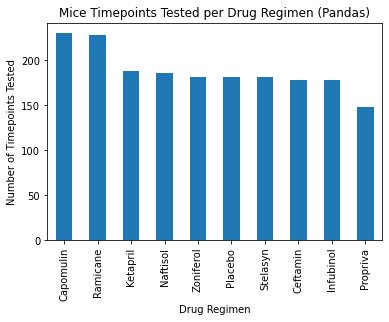

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_chart_data = clean_mouse_study_df.groupby("Drug Regimen")\
                                     .agg({"Timepoint": "count"})\
                                     .rename(columns={"Timepoint": "Number of Timepoints Tested"})\
                                     .sort_values("Number of Timepoints Tested", ascending=False)
pandas_bar_plot = bar_chart_data.plot(kind="bar", y="Number of Timepoints Tested", legend=False, title="Mice Timepoints Tested per Drug Regimen (Pandas)")
# pandas 1.0.5 (PythonData) does not have `xlabel` and `ylabel` as part of .plot() kwargs, this is added in version 1.1.0
pandas_bar_plot = pandas_bar_plot.set(xlabel="Drug Regimen", ylabel="Number of Timepoints Tested")

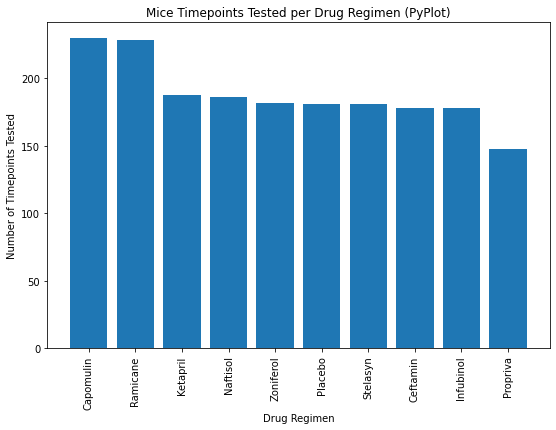

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize=(9, 6), facecolor='white')
plt.bar(bar_chart_data.index, bar_chart_data["Number of Timepoints Tested"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints Tested")
plt.title("Mice Timepoints Tested per Drug Regimen (PyPlot)")
plt.tick_params(axis='x', labelrotation=90)
plt.show()

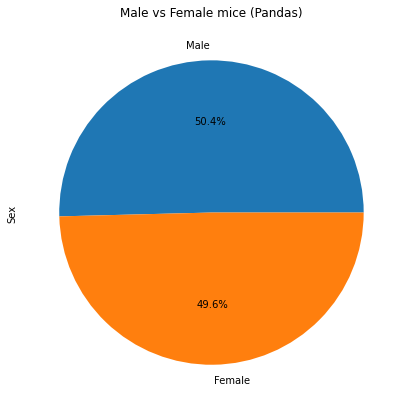

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fig, ax = plt.subplots(figsize=(7, 7), facecolor='white')  # force white background so text can be seen in dark VS Code
by_sex_series.plot.pie(title="Male vs Female mice (Pandas)", autopct='%.1f%%')
plt.show()


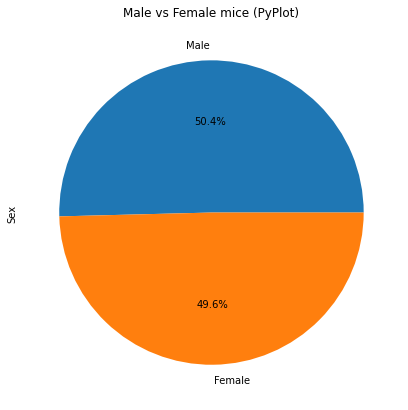

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_fig, pie_ax = plt.subplots(figsize=(7, 7), facecolor="white")
pie_ax.pie(by_sex_series, labels=by_sex_series.index, autopct='%.1f%%')
pie_ax.set(title="Male vs Female mice (PyPlot)", ylabel="Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
list_selected_regimens = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo']

# Perform a groupby on the 'Mouse ID' column
df_grouped_Mouse_ID = mouse_study_df.groupby('Mouse ID')

# Get the index of the row with the maximum 'Timepoint' value for each group (Mouse ID)
series_idx = df_grouped_Mouse_ID['Timepoint'].idxmax()

# Returns a subset of the original dataframe containing only rows with the maximum 'Timepoint' value for each Mouse ID
df_max_timepoint = mouse_study_df.loc[series_idx.reset_index(drop=True)]

# View the new dataframe
df_max_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
907,a203,45,67.973419,2,Infubinol,Female,20,23
289,a251,45,65.525743,1,Infubinol,Female,21,25
1134,a262,45,70.717621,4,Placebo,Female,17,29
1487,a275,45,62.999356,3,Ceftamin,Female,20,28
736,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1566,z435,10,48.710661,0,Propriva,Female,12,26
646,z578,45,30.638696,0,Ramicane,Male,11,16
279,z581,45,62.754451,3,Infubinol,Female,24,25
683,z795,45,65.741070,3,Naftisol,Female,13,29


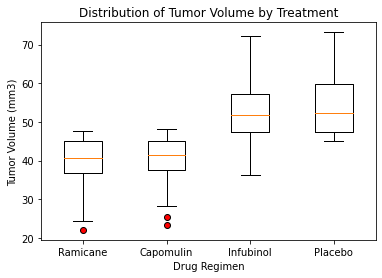

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Put treatments into a list for for loop (and later for plot labels)
list_selected_regimens

# Create empty list to fill with tumor vol data (for plotting)
list_tumor_volume = []

# Loop through each regimen and get the tumor volume data
for regimen in list_selected_regimens:
    # Subset the dataframe by regimen
    subset_df = mouse_study_df[mouse_study_df['Drug Regimen'] == regimen]
    
    # Get the tumor volume data
    tumor_vol_data = subset_df['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    list_tumor_volume.append(tumor_vol_data)

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a boxplot using the axis object
ax.boxplot(list_tumor_volume,flierprops={'marker': 'o', 'markerfacecolor': 'red'})

# Set the x-axis label
ax.set_xlabel('Drug Regimen')

# Set the y-axis label
ax.set_ylabel('Tumor Volume (mm3)')

# Set the title
ax.set_title('Distribution of Tumor Volume by Treatment')

# Set the x-axis tick labels to be the distinct regimens
ax.set_xticklabels(list_selected_regimens)

# Show the plot
plt.show()

## Line and Scatter Plots

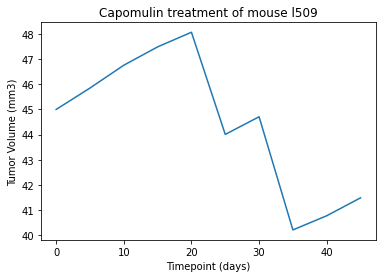

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

df_capomulin = mouse_study_df[(mouse_study_df['Drug Regimen'] == "Capomulin") & (mouse_study_df['Mouse ID'] == "l509")]

# plot the data as a line plot
plt.plot(df_capomulin["Timepoint"], df_capomulin["Tumor Volume (mm3)"])

# add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# show the plot
plt.show()

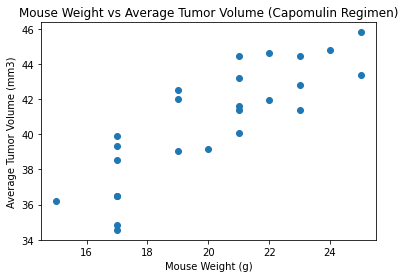

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter the DataFrame for Capomulin
capomulin_df = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group the DataFrame by mouse ID and calculate average tumor volume and mouse weight
grouped_capomulin = capomulin_df.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'mean')).reset_index()

# Create scatter plot
plt.scatter(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Regimen)')


# Show the plot
plt.show()


## Correlation and Regression

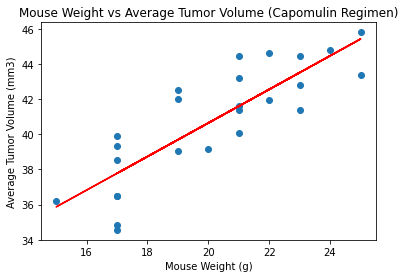

In [32]:
# Filter the DataFrame for Capomulin regimen
capomulin_df = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group the DataFrame by mouse ID and calculate average tumor volume and mouse weight
grouped_capomulin = capomulin_df.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'mean')).reset_index()

# Create scatter plot
plt.scatter(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Calculate regression line
regress_values = grouped_capomulin['Mouse_Weight'] * slope + intercept

# Plot the regression line
plt.plot(grouped_capomulin['Mouse_Weight'], regress_values, color='red')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Regimen)')



# Show the plot
plt.show()